# 4. 연도별 데이터 병합

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_2_5/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
new_dataset_2019 = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/new_dataset_2019.csv',encoding='CP949', index_col=0)
new_dataset_2020 = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/new_dataset_2020.csv',encoding='CP949', index_col=0)
new_dataset_2021 = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/new_dataset_2021.csv',encoding='CP949', index_col=0)
new_dataset_2022 = pd.read_csv('/Users/seogang-un/ICT_G/horse_race_project/new_dataset_2022.csv',encoding='CP949', index_col=0)
total_dataset = pd.concat([new_dataset_2019,new_dataset_2020,new_dataset_2021,new_dataset_2022],ignore_index=True)
total_dataset

,순위,마번,중량,레이팅,마체중,증감,distance,track,나이_마,총출전_마,...,등급_국2,등급_국3,등급_국4,등급_국5,등급_국6,등급_미,등급_외1,등급_외2,등급_외3,등급_외4
0,1,9,53.0,0.0,483,-6,1000,14.0,2,2,...,0,0,0,1,0,0,0,0,0,0
1,2,12,55.0,0.0,470,-14,1000,14.0,2,1,...,0,0,0,0,1,0,0,0,0,0
2,3,5,53.0,0.0,475,1,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
3,4,8,55.0,0.0,432,-2,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,6,55.0,0.0,472,-8,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34756,10,13,53.5,57.0,517,-1,1200,2.0,5,10,...,0,1,0,0,0,0,0,0,0,0
34757,11,6,54.5,57.0,490,-7,1200,2.0,5,8,...,0,0,0,0,0,0,0,0,1,0
34758,12,10,53.0,54.0,533,9,1200,2.0,5,12,...,0,1,0,0,0,0,0,0,0,0
34759,13,8,52.5,53.0,518,5,1200,2.0,6,23,...,0,1,0,0,0,0,0,0,0,0


# 5. 모델 학습

## 5.1 case1: 1~n등으로 분류

In [45]:
total_dataset = pd.concat([new_dataset_2019,new_dataset_2020,new_dataset_2021,new_dataset_2022],ignore_index=True)
total_dataset['순위'].value_counts()

2     3034
5     3030
1     3028
4     3028
6     3028
7     3025
3     3023
8     3002
9     2811
10    2597
11    2302
12    1927
13     490
14     421
15      10
16       5
Name: 순위, dtype: int64

In [46]:
df_pre = total_dataset
df = df_pre.sample(frac=1)
df

,순위,마번,중량,레이팅,마체중,증감,distance,track,나이_마,총출전_마,...,등급_국2,등급_국3,등급_국4,등급_국5,등급_국6,등급_미,등급_외1,등급_외2,등급_외3,등급_외4
314,7,3,53.0,0.0,470,0,1000,10.0,2,3,...,0,0,0,0,1,0,0,0,0,0
21596,11,11,52.0,51.0,478,2,1400,11.0,6,33,...,0,1,0,0,0,0,0,0,0,0
3493,11,10,52.0,21.0,434,-6,1000,5.0,6,38,...,0,0,0,1,0,0,0,0,0,0
23590,5,5,57.0,48.0,462,-8,1400,8.0,4,13,...,0,0,1,0,0,0,0,0,0,0
8525,3,8,51.0,22.0,428,0,1300,4.0,4,18,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18568,8,12,54.5,49.0,449,2,1400,12.0,3,13,...,0,0,1,0,0,0,0,0,0,0
220,6,11,52.0,27.0,434,-10,1700,15.0,3,7,...,0,0,0,1,0,0,0,0,0,0
32872,5,8,57.0,35.0,470,-6,1300,5.0,5,13,...,0,0,0,1,0,0,0,0,0,0
26245,1,9,55.0,0.0,432,-13,1200,5.0,4,5,...,0,0,0,0,1,0,0,0,0,0


In [58]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [59]:
Y

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


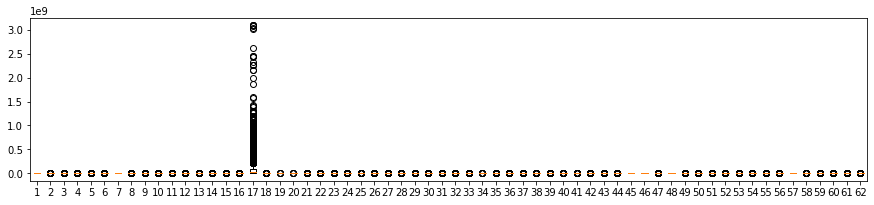

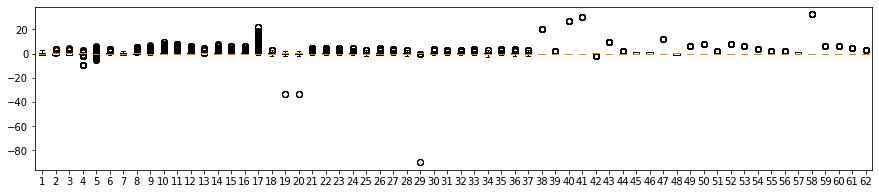

In [47]:
#원핫인코딩
dataset = df.values
X = dataset[:,1:63].astype(float)
Y_obj = dataset[:,0]

e = LabelEncoder()
Y = e.fit_transform(Y_obj)
Y = tf.keras.utils.to_categorical(Y)

print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = seed)


#정규화 (x-평균)/표준편차
X_train_ss = StandardScaler().fit_transform(X_train)
X_test_ss = StandardScaler().fit_transform(X_test)

plt.figure(figsize=(15,3))
plt.boxplot(X_train)
plt.show()
plt.figure(figsize=(15,3))
plt.boxplot(X_train_ss)
plt.show()

2022-08-28 15:54:53.304398: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-28 15:54:53.304490: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-28 15:54:53.377123: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-28 15:54:53.377286: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-28 15:54:53.487243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Metal device set to: Apple M1
Epoch 1/5000
1631/1631 [==============================] - ETA: 0s - loss: 2.6939 - accuracy: 0.0866

2022-08-28 15:55:03.818943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1631/1631 [==============================] - 13s 8ms/step - loss: 2.6939 - accuracy: 0.0866 - val_loss: 2.6184 - val_accuracy: 0.1017

Epoch 00001: val_loss improved from inf to 2.61837, saving model to ./model/01-2.6184.hdf5
Epoch 2/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 2.5816 - accuracy: 0.1112 - val_loss: 2.5457 - val_accuracy: 0.1271

Epoch 00002: val_loss improved from 2.61837 to 2.54568, saving model to ./model/02-2.5457.hdf5
Epoch 3/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 2.5306 - accuracy: 0.1269 - val_loss: 2.5138 - val_accuracy: 0.1301

Epoch 00003: val_loss improved from 2.54568 to 2.51378, saving model to ./model/03-2.5138.hdf5
Epoch 4/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 2.5034 - accuracy: 0.1367 - val_loss: 2.4945 - val_accuracy: 0.1341

Epoch 00004: val_loss improved from 2.51378 to 2.49445, saving model to ./model/04-2.4945.hdf5
Epoch 5/5000
1631/1631 [=====================

1631/1631 [==============================] - 13s 8ms/step - loss: 2.3307 - accuracy: 0.1939 - val_loss: 2.3972 - val_accuracy: 0.1658

Epoch 00035: val_loss improved from 2.39790 to 2.39715, saving model to ./model/35-2.3972.hdf5
Epoch 36/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 2.3284 - accuracy: 0.1973 - val_loss: 2.3976 - val_accuracy: 0.1660

Epoch 00036: val_loss did not improve from 2.39715
Epoch 37/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 2.3269 - accuracy: 0.1958 - val_loss: 2.3986 - val_accuracy: 0.1679

Epoch 00037: val_loss did not improve from 2.39715
Epoch 38/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 2.3251 - accuracy: 0.1961 - val_loss: 2.3995 - val_accuracy: 0.1653

Epoch 00038: val_loss did not improve from 2.39715
Epoch 39/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 2.3232 - accuracy: 0.1964 - val_loss: 2.3976 - val_accuracy: 0.1646

Epoch 00039: val_loss

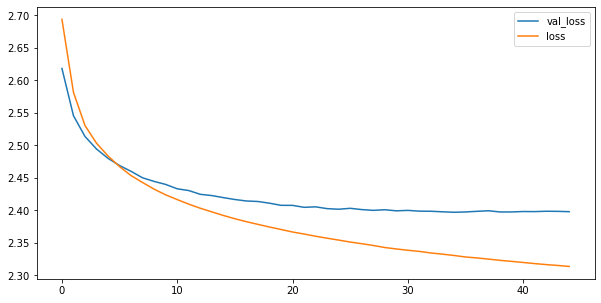

In [6]:
model = Sequential()
model.add(Dense(30, input_dim=62, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(16, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)

history = model.fit(X_train_ss,Y_train, validation_split=0.33,epochs=5000,batch_size=10, callbacks=[early_stopping_callback,checkpointer])
hist = pd.DataFrame(history.history)
print(hist.tail())

y_vloss=history.history['val_loss']
#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_loss=history.history['loss']

import matplotlib.pyplot as plt
#X값을 지정하고 정확도와 오차 표시
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10,5))
plt.plot(x_len,y_vloss, label='val_loss')
plt.plot(x_len,y_loss, label='loss')

plt.legend()
plt.show()


In [7]:
len(Y_test)

Y_test.shape

(10429, 16)

In [8]:
predict_matrix = np.zeros((16,16))
Y_predictions = model.predict(X_test_ss)
#예측 검증
for i in range(len(Y_test)):
    label = Y_test[i]
    Y_prediction = Y_predictions[i]
    for j in range(16):
        if Y_prediction.argmax() == j:
            if   list(label) == [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[0,j]+=1
            elif list(label) == [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[1,j]+=1
            elif list(label) == [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[2,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[3,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[4,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[5,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[6,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[7,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[8,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[9,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[10,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]: predict_matrix[11,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]: predict_matrix[12,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]: predict_matrix[13,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]: predict_matrix[14,j]+=1
            elif list(label) == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]: predict_matrix[15,j]+=1
            else: print('no')
predict_matrix


2022-08-28 16:05:46.553367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[422., 131.,  94.,  59.,  26.,  46.,   5.,  47.,  20.,   7.,   5.,
          7.,   0.,   1.,   0.,   0.],
       [188., 303., 164.,  60.,  33.,  57.,  18.,  48.,  42.,   6.,  13.,
         17.,   0.,   0.,   0.,   0.],
       [115., 137., 260.,  70.,  48.,  72.,  27.,  74.,  52.,  12.,  18.,
         27.,   0.,   0.,   0.,   0.],
       [ 99., 121., 126.,  67.,  50., 100.,  33., 129.,  80.,  20.,  24.,
         20.,   0.,   0.,   0.,   0.],
       [ 81., 116.,  94.,  75.,  56., 123.,  39., 150.,  79.,  24.,  34.,
         31.,   0.,   0.,   0.,   0.],
       [ 77.,  98., 105.,  64.,  59., 132.,  39., 171.,  96.,  25.,  39.,
         40.,   0.,   0.,   0.,   0.],
       [ 64.,  83.,  90.,  72.,  62., 120.,  39., 209.,  86.,  33.,  59.,
         49.,   0.,   0.,   0.,   0.],
       [ 53.,  74.,  92.,  45.,  61.,  99.,  40., 184.,  98.,  32.,  44.,
         41.,   0.,   0.,   0.,   0.],
       [ 53.,  68.,  79.,  64.,  40.,  94.,  44., 176.,  89.,  39.,  57.,
         52.,   0.,   

In [9]:
print('1등 예측 확률 : %.4f' %(predict_matrix[0,0]/predict_matrix[:,0].sum()))
print('2등 예측 확률 : %.4f' %(predict_matrix[1,1]/predict_matrix[:,1].sum()))
print('3등 예측 확률 : %.4f' %(predict_matrix[2,2]/predict_matrix[:,2].sum()))
print('\n')
print('1등 누락 확률 : %.4f' %(1-(predict_matrix[0,0]/predict_matrix[0,:].sum())))
print('2등 누락 확률 : %.4f' %(1-(predict_matrix[1,1]/predict_matrix[1,:].sum())))
print('3등 누락 확률 : %.4f' %(1-(predict_matrix[2,2]/predict_matrix[2,:].sum())))
print('\n')
print('1등 예상 -> 순위권 확률 : %.4f' %(predict_matrix[:3,0].sum()/predict_matrix[:,0].sum()))
print('2등 예상 -> 순위권 확률 : %.4f' %(predict_matrix[:3,1].sum()/predict_matrix[:,1].sum()))
print('3등 예상 -> 순위권 확률 : %.4f' %(predict_matrix[:3,2].sum()/predict_matrix[:,2].sum()))

1등 예측 확률 : 0.3328
2등 예측 확률 : 0.2358
3등 예측 확률 : 0.2019


1등 누락 확률 : 0.5149
2등 누락 확률 : 0.6807
3등 누락 확률 : 0.7149


1등 예상 -> 순위권 확률 : 0.5718
2등 예상 -> 순위권 확률 : 0.4444
3등 예상 -> 순위권 확률 : 0.4022


## 5.2 case2 : 1등, 2등, 3등, 4-n등으로 분류

In [30]:
total_dataset = pd.concat([new_dataset_2019,new_dataset_2020,new_dataset_2021,new_dataset_2022],ignore_index=True)

In [31]:
#4순위 이상을 4로 변환
for i in range(len(total_dataset['순위'])):
    if total_dataset['순위'][i] <=3:
        total_dataset['순위'][i] = total_dataset.loc[i]['순위']
    else :
        total_dataset['순위'][i] = 4
        
total_dataset


/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_34771/4218223274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_dataset['순위'][i] = total_dataset.loc[i]['순위']
/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_34771/4218223274.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_dataset['순위'][i] = 4


,순위,마번,중량,레이팅,마체중,증감,distance,track,나이_마,총출전_마,...,등급_국2,등급_국3,등급_국4,등급_국5,등급_국6,등급_미,등급_외1,등급_외2,등급_외3,등급_외4
0,1,9,53.0,0.0,483,-6,1000,14.0,2,2,...,0,0,0,1,0,0,0,0,0,0
1,2,12,55.0,0.0,470,-14,1000,14.0,2,1,...,0,0,0,0,1,0,0,0,0,0
2,3,5,53.0,0.0,475,1,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
3,4,8,55.0,0.0,432,-2,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,4,6,55.0,0.0,472,-8,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34756,4,13,53.5,57.0,517,-1,1200,2.0,5,10,...,0,1,0,0,0,0,0,0,0,0
34757,4,6,54.5,57.0,490,-7,1200,2.0,5,8,...,0,0,0,0,0,0,0,0,1,0
34758,4,10,53.0,54.0,533,9,1200,2.0,5,12,...,0,1,0,0,0,0,0,0,0,0
34759,4,8,52.5,53.0,518,5,1200,2.0,6,23,...,0,1,0,0,0,0,0,0,0,0


In [32]:
total_dataset['순위'].value_counts()

4    25676
2     3034
1     3028
3     3023
Name: 순위, dtype: int64

In [13]:
df_pre = total_dataset
df = df_pre.sample(frac=1)
df

,순위,마번,중량,레이팅,마체중,증감,distance,track,나이_마,총출전_마,...,등급_국2,등급_국3,등급_국4,등급_국5,등급_국6,등급_미,등급_외1,등급_외2,등급_외3,등급_외4
16325,4,5,55.5,0.0,489,5,1400,3.0,4,8,...,0,0,0,0,1,0,0,0,0,0
30729,2,9,54.0,0.0,462,1,1200,3.0,3,7,...,0,0,0,1,0,0,0,0,0,0
14872,4,12,56.0,76.0,505,-12,1400,13.0,4,15,...,1,0,0,0,0,0,0,0,0,0
19913,4,12,54.0,0.0,466,-3,1200,5.0,3,8,...,0,0,0,0,1,0,0,0,0,0
24020,4,4,52.0,36.0,476,-8,1200,11.0,5,20,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27576,3,8,56.0,59.0,468,-3,1200,11.0,4,6,...,0,0,0,0,0,0,0,0,1,0
11237,4,1,53.0,31.0,470,3,1700,2.0,4,11,...,0,0,0,1,0,0,0,0,0,0
33991,4,14,56.0,73.0,482,0,1800,2.0,5,9,...,0,0,0,0,0,0,0,1,0,0
33082,1,4,52.0,107.0,509,-5,2000,5.0,6,24,...,0,0,0,0,0,0,0,0,0,0


[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


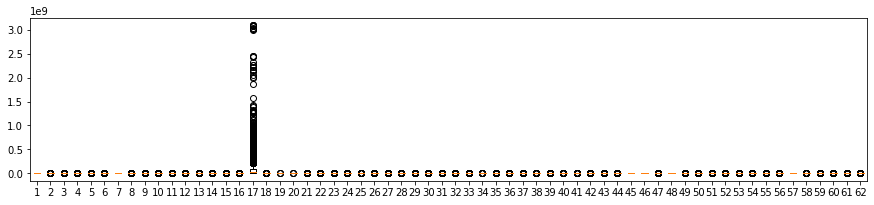

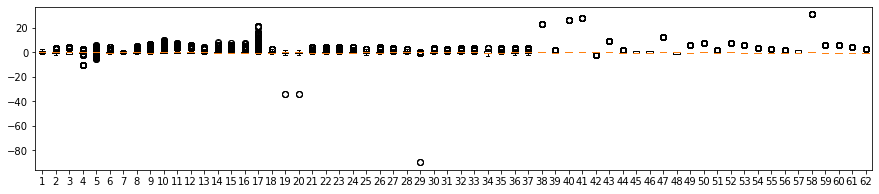

In [14]:
#정규화 및 원핫인코딩

dataset = df.values
X = dataset[:,1:63].astype(float)
Y_obj = dataset[:,0]

e = LabelEncoder()
Y = e.fit_transform(Y_obj)
Y = tf.keras.utils.to_categorical(Y)

print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = seed)


#정규화 (x-평균)/표준편차
X_train_ss = StandardScaler().fit_transform(X_train)
X_test_ss = StandardScaler().fit_transform(X_test)
plt.figure(figsize=(15,3))
plt.boxplot(X_train)
plt.show()

plt.figure(figsize=(15,3))
plt.boxplot(X_train_ss)
plt.show()

Epoch 1/5000
  16/1631 [..............................] - ETA: 10s - loss: 1.6172 - accuracy: 0.0875    

2022-08-28 16:05:51.054297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1630/1631 [============================>.] - ETA: 0s - loss: 1.0221 - accuracy: 0.6448

2022-08-28 16:06:01.301001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1631/1631 [==============================] - 13s 8ms/step - loss: 1.0223 - accuracy: 0.6447 - val_loss: 0.8259 - val_accuracy: 0.7440

Epoch 00001: val_loss improved from inf to 0.82591, saving model to ./model/01-0.8259.hdf5
Epoch 2/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 0.8186 - accuracy: 0.7389 - val_loss: 0.7999 - val_accuracy: 0.7442

Epoch 00002: val_loss improved from 0.82591 to 0.79988, saving model to ./model/02-0.7999.hdf5
Epoch 3/5000
1631/1631 [==============================] - 14s 8ms/step - loss: 0.7948 - accuracy: 0.7393 - val_loss: 0.7862 - val_accuracy: 0.7445

Epoch 00003: val_loss improved from 0.79988 to 0.78615, saving model to ./model/03-0.7862.hdf5
Epoch 4/5000
1631/1631 [==============================] - 13s 8ms/step - loss: 0.7792 - accuracy: 0.7408 - val_loss: 0.7751 - val_accuracy: 0.7453

Epoch 00004: val_loss improved from 0.78615 to 0.77512, saving model to ./model/04-0.7751.hdf5
Epoch 5/5000
1631/1631 [=====================

1631/1631 [==============================] - 13s 8ms/step - loss: 0.6667 - accuracy: 0.7733 - val_loss: 0.7296 - val_accuracy: 0.7584

Epoch 00037: val_loss did not improve from 0.72776
        loss  accuracy  val_loss  val_accuracy
32  0.672696  0.770703  0.728779      0.759402
33  0.670883  0.771868  0.729254      0.757908
34  0.669789  0.772605  0.728342      0.759029
35  0.667830  0.773279  0.729597      0.758780
36  0.666748  0.773279  0.729610      0.758406


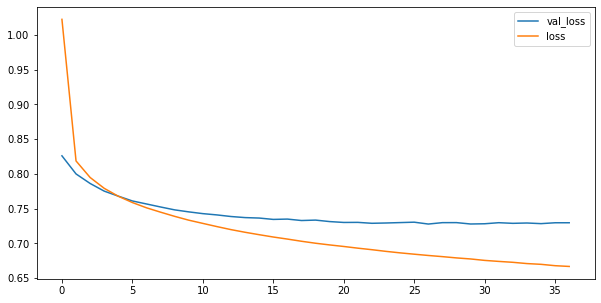

In [15]:
model = Sequential()
model.add(Dense(30, input_dim=62, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer ,metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15)
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)

history = model.fit(X_train_ss,Y_train, validation_split=0.33,epochs=5000,batch_size=10, callbacks=[early_stopping_callback,checkpointer])
hist = pd.DataFrame(history.history)
print(hist.tail())

y_vloss=history.history['val_loss']
#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_loss=history.history['loss']

import matplotlib.pyplot as plt
#X값을 지정하고 정확도와 오차 표시
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10,5))
plt.plot(x_len,y_vloss,label='val_loss')
plt.plot(x_len,y_loss,label='loss')

plt.legend()
plt.show()

In [16]:
#예측 검증
#행 : 실제 순위
#열 : 예상 순위

predict_matrix = np.zeros((4,4))
omit_prediction = np.zeros(4)
Y_predictions = model.predict(X_test_ss)

for i in range(len(Y_test)):
    label = Y_test[i]
    Y_prediction = Y_predictions[i]

    if Y_prediction.argmax()+1 == 1:
        if   list(label) == [1.0, 0.0, 0.0, 0.0]: predict_matrix[0,0]+=1
        elif list(label) == [0.0, 1.0, 0.0, 0.0]: predict_matrix[1,0]+=1
        elif list(label) == [0.0, 0.0, 1.0, 0.0]: predict_matrix[2,0]+=1
        elif list(label) == [0.0, 0.0, 0.0, 1.0]: predict_matrix[3,0]+=1
            
    elif Y_prediction.argmax()+1 == 2:
        if   list(label) == [1.0, 0.0, 0.0, 0.0]: predict_matrix[0,1]+=1
        elif list(label) == [0.0, 1.0, 0.0, 0.0]: predict_matrix[1,1]+=1
        elif list(label) == [0.0, 0.0, 1.0, 0.0]: predict_matrix[2,1]+=1
        elif list(label) == [0.0, 0.0, 0.0, 1.0]: predict_matrix[3,1]+=1
            
    elif Y_prediction.argmax()+1 == 3:
        if   list(label) == [1.0, 0.0, 0.0, 0.0]: predict_matrix[0,2]+=1
        elif list(label) == [0.0, 1.0, 0.0, 0.0]: predict_matrix[1,2]+=1
        elif list(label) == [0.0, 0.0, 1.0, 0.0]: predict_matrix[2,2]+=1
        elif list(label) == [0.0, 0.0, 0.0, 1.0]: predict_matrix[3,2]+=1

    elif Y_prediction.argmax()+1 == 4:
        if   list(label) == [1.0, 0.0, 0.0, 0.0]: 
            predict_matrix[0,3]+=1
            omit_prediction = np.block([[omit_prediction],[Y_prediction]])
        elif list(label) == [0.0, 1.0, 0.0, 0.0]: 
            predict_matrix[1,3]+=1
            omit_prediction = np.block([[omit_prediction],[Y_prediction]])
        elif list(label) == [0.0, 0.0, 1.0, 0.0]: 
            predict_matrix[2,3]+=1
            omit_prediction = np.block([[omit_prediction],[Y_prediction]])
        elif list(label) == [0.0, 0.0, 0.0, 1.0]: 
            predict_matrix[3,3]+=1
            omit_prediction = np.block([[omit_prediction],[Y_prediction]])
            
predict_matrix

#행 : 실제 순위
#열 : 예상 순위

2022-08-28 16:14:09.194973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[ 313.,   44.,   14.,  540.],
       [  61.,  109.,   10.,  721.],
       [  54.,   35.,   25.,  845.],
       [ 137.,   96.,   37., 7388.]])

In [17]:
print('1등 예측 확률 : %.4f' %(predict_matrix[0,0]/predict_matrix[:,0].sum()))
print('2등 예측 확률 : %.4f' %(predict_matrix[1,1]/predict_matrix[:,1].sum()))
print('3등 예측 확률 : %.4f' %(predict_matrix[2,2]/predict_matrix[:,2].sum()))
print('4등 예측 확률 : %.4f' %(predict_matrix[3,3]/predict_matrix[:,3].sum()))
print('\n')
print('1등 누락 확률 : %.4f' %(1-(predict_matrix[0,0]/predict_matrix[0,:].sum())))
print('2등 누락 확률 : %.4f' %(1-(predict_matrix[1,1]/predict_matrix[1,:].sum())))
print('3등 누락 확률 : %.4f' %(1-(predict_matrix[2,2]/predict_matrix[2,:].sum())))
print('4등 누락 확률 : %.4f' %(1-(predict_matrix[3,3]/predict_matrix[3,:].sum())))
print('\n')
print('1등 예상 -> 순위권 확률 : %.4f' %(predict_matrix[:3,0].sum()/predict_matrix[:,0].sum()))
print('2등 예상 -> 순위권 확률 : %.4f' %(predict_matrix[:3,1].sum()/predict_matrix[:,1].sum()))
print('3등 예상 -> 순위권 확률 : %.4f' %(predict_matrix[:3,2].sum()/predict_matrix[:,2].sum()))

print('\n')
print('실제 순위권인데 순위밖으로 예상할 확률 : %.4f' %(predict_matrix[:3,3].sum()/predict_matrix[:3,:].sum()))

1등 예측 확률 : 0.5540
2등 예측 확률 : 0.3838
3등 예측 확률 : 0.2907
4등 예측 확률 : 0.7782


1등 누락 확률 : 0.6564
2등 누락 확률 : 0.8790
3등 누락 확률 : 0.9739
4등 누락 확률 : 0.0353


1등 예상 -> 순위권 확률 : 0.7575
2등 예상 -> 순위권 확률 : 0.6620
3등 예상 -> 순위권 확률 : 0.5698


실제 순위권인데 순위밖으로 예상할 확률 : 0.7600


## 5.3 case3: 1-3등,  4-n등으로 분류

In [3]:
total_dataset = pd.concat([new_dataset_2019,new_dataset_2020,new_dataset_2021,new_dataset_2022],ignore_index=True)
total_dataset

,순위,마번,중량,레이팅,마체중,증감,distance,track,나이_마,총출전_마,...,등급_국2,등급_국3,등급_국4,등급_국5,등급_국6,등급_미,등급_외1,등급_외2,등급_외3,등급_외4
0,1,9,53.0,0.0,483,-6,1000,14.0,2,2,...,0,0,0,1,0,0,0,0,0,0
1,2,12,55.0,0.0,470,-14,1000,14.0,2,1,...,0,0,0,0,1,0,0,0,0,0
2,3,5,53.0,0.0,475,1,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
3,4,8,55.0,0.0,432,-2,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,6,55.0,0.0,472,-8,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34756,10,13,53.5,57.0,517,-1,1200,2.0,5,10,...,0,1,0,0,0,0,0,0,0,0
34757,11,6,54.5,57.0,490,-7,1200,2.0,5,8,...,0,0,0,0,0,0,0,0,1,0
34758,12,10,53.0,54.0,533,9,1200,2.0,5,12,...,0,1,0,0,0,0,0,0,0,0
34759,13,8,52.5,53.0,518,5,1200,2.0,6,23,...,0,1,0,0,0,0,0,0,0,0


In [4]:
# 1~3순위 : 1
# 4~순위 : 0
for i in range(len(total_dataset['순위'])):
    if total_dataset['순위'][i] <=3:
        total_dataset['순위'][i] = 1
    else :
        total_dataset['순위'][i] = 0
        
total_dataset

/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_35460/472490602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_dataset['순위'][i] = 1
/var/folders/hy/tw96brx1529_p9r44x7stnp80000gn/T/ipykernel_35460/472490602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_dataset['순위'][i] = 0


,순위,마번,중량,레이팅,마체중,증감,distance,track,나이_마,총출전_마,...,등급_국2,등급_국3,등급_국4,등급_국5,등급_국6,등급_미,등급_외1,등급_외2,등급_외3,등급_외4
0,1,9,53.0,0.0,483,-6,1000,14.0,2,2,...,0,0,0,1,0,0,0,0,0,0
1,1,12,55.0,0.0,470,-14,1000,14.0,2,1,...,0,0,0,0,1,0,0,0,0,0
2,1,5,53.0,0.0,475,1,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
3,0,8,55.0,0.0,432,-2,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,0,6,55.0,0.0,472,-8,1000,14.0,2,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34756,0,13,53.5,57.0,517,-1,1200,2.0,5,10,...,0,1,0,0,0,0,0,0,0,0
34757,0,6,54.5,57.0,490,-7,1200,2.0,5,8,...,0,0,0,0,0,0,0,0,1,0
34758,0,10,53.0,54.0,533,9,1200,2.0,5,12,...,0,1,0,0,0,0,0,0,0,0
34759,0,8,52.5,53.0,518,5,1200,2.0,6,23,...,0,1,0,0,0,0,0,0,0,0


In [6]:
total_dataset_copy = total_dataset.copy()
total_dataset_copy['순위'].value_counts()

0    25676
1     9085
Name: 순위, dtype: int64

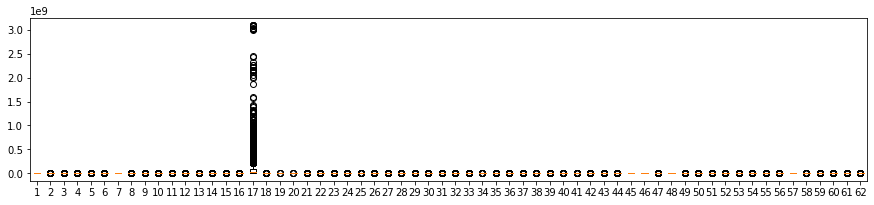

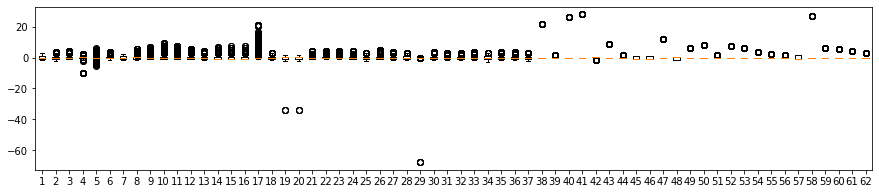

In [7]:
#원핫인코딩 및 정규화

dataset = total_dataset_copy.values
X = dataset[:,1:63].astype(float)
Y = dataset[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

plt.figure(figsize=(15, 3))
plt.boxplot(X_train)
plt.show()
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

plt.figure(figsize=(15, 3))
plt.boxplot(X_train)
plt.show()

2022-08-28 18:42:43.340131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-28 18:42:43.340365: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-28 18:42:43.439332: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-28 18:42:43.439494: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
Epoch 1/5000
  11/1864 [..............................] - ETA: 9s - loss: 0.5911 - accuracy: 0.8000  

2022-08-28 18:42:43.562398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1864/1864 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.7402

2022-08-28 18:42:52.931366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1864/1864 [==============================] - 12s 6ms/step - loss: 0.5525 - accuracy: 0.7402 - val_loss: 0.5334 - val_accuracy: 0.7365

Epoch 00001: val_loss improved from inf to 0.53337, saving model to ./model/01-0.7402.hdf5
Epoch 2/5000
1864/1864 [==============================] - 11s 6ms/step - loss: 0.5192 - accuracy: 0.7432 - val_loss: 0.5170 - val_accuracy: 0.7432

Epoch 00002: val_loss improved from 0.53337 to 0.51703, saving model to ./model/02-0.7432.hdf5
Epoch 3/5000
1864/1864 [==============================] - 11s 6ms/step - loss: 0.5064 - accuracy: 0.7518 - val_loss: 0.5066 - val_accuracy: 0.7481

Epoch 00003: val_loss improved from 0.51703 to 0.50660, saving model to ./model/03-0.7518.hdf5
Epoch 4/5000
1864/1864 [==============================] - 11s 6ms/step - loss: 0.4978 - accuracy: 0.7581 - val_loss: 0.5018 - val_accuracy: 0.7496

Epoch 00004: val_loss improved from 0.50660 to 0.50178, saving model to ./model/04-0.7581.hdf5
Epoch 5/5000
1864/1864 [=====================

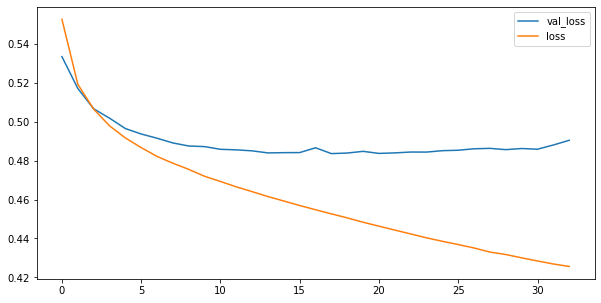

In [8]:
model = Sequential()
model.add(Dense(30, input_dim=62, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15)
# 모델 저장 조건 설정
modelpath='./model/{epoch:02d}-{accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(X_train, Y_train, validation_split = 0.33, epochs=5000, batch_size=10, callbacks=[early_stopping_callback, checkpointer])
hist = pd.DataFrame(history.history)
print(hist.tail())


y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10, 5))
plt.plot(x_len, y_vloss, label = 'val_loss')
plt.plot(x_len, y_loss, label = 'loss')
plt.legend()
plt.show()

In [9]:
len(X_test)

6953

In [10]:
#예측 검증
#행 : 실제 순위
#열 : 예상 순위

predict_matrix = np.zeros((2,2))

Y_predictions = model.predict(X_test)

for i in range(len(Y_test)):
    label = Y_test[i]
    Y_prediction = Y_predictions[i]

    if round(float(Y_prediction)) == 1:
        if   label == 1: predict_matrix[0,0]+=1
        elif label == 0: predict_matrix[1,0]+=1

            
    elif round(float(Y_prediction)) == 0:
        if   label == 1: predict_matrix[0,1]+=1
        elif label == 0: predict_matrix[1,1]+=1

            

predict_matrix

#행 : 실제 순위
#열 : 예상 순위

2022-08-28 18:48:48.919222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[ 663., 1163.],
       [ 410., 4717.]])

In [11]:
print('1~3등 예측 확률 : %.4f' %(predict_matrix[0,0]/predict_matrix[:,0].sum()))
print('4~등 예측 확률 : %.4f' %(predict_matrix[1,1]/predict_matrix[:,1].sum()))

print('\n')
print('1~3등 누락 확률 : %.4f' %(1-(predict_matrix[0,0]/predict_matrix[0,:].sum())))
print('4~등 누락 확률 : %.4f' %(1-(predict_matrix[1,1]/predict_matrix[1,:].sum())))

1~3등 예측 확률 : 0.6179
4~등 예측 확률 : 0.8022


1~3등 누락 확률 : 0.6369
4~등 누락 확률 : 0.0800
